# MobileNet Image Classification using TensorFlow Keras library

**Notes and Reference**  

  1) Source code from:  
- deeplizard (2020) MobileNet Image Classification with TensorFlow's Keras API https://www.youtube.com/watch?v=5JAZiue-fzY&ab_channel=deeplizard  

2) Images from:  
- koustubhk (2020) Object Detection Sample Images https://www.kaggle.com/kkhandekar/object-detection-sample-images

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


## 1) Create model

In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [5]:
images = os.listdir("SampleImages")

# 1 resize - 2 arrayrise - 3 expand dimension - 4 scale down RGBs
def prepare_image(file):
    img_path = "SampleImages/"
    # resize input image to the one that MobileNet expects
    img = image.load_img(img_path + file, target_size=(224, 224))
    # format conversion into array
    img_array = image.img_to_array(img)
    # shape conversion for the compatibility with MobileNet
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    # pass the processed image into the MobileNet function to process the input
    # MobileNet's pre-processing scales the RGB pixel values (0-255) down to (-1 to 1).
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

## 2) Test with a sample image

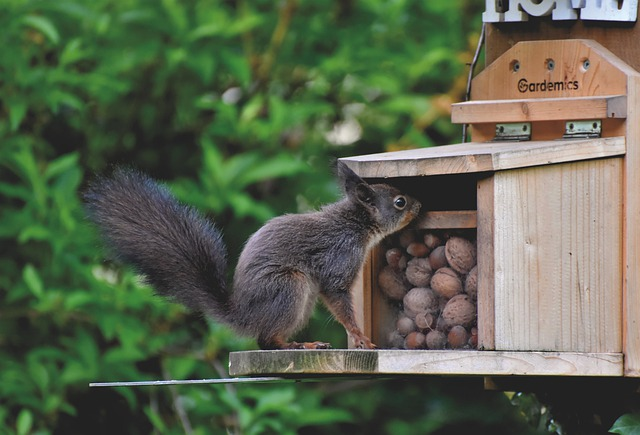

In [6]:
from IPython.display import Image
Image(filename="SampleImages/" + images[0], width=300, height=200)

In [20]:
preprocessed_image = prepare_image(images[0])
predictions = mobile.predict(preprocessed_image)
# The following function returns the top 5 predicted classes out of 1,000 ImageNet classes. 
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02493793', 'spider_monkey', 0.86599594),
  ('n02356798', 'fox_squirrel', 0.04572088),
  ('n02500267', 'indri', 0.010863867),
  ('n02483362', 'gibbon', 0.009124184),
  ('n02497673', 'Madagascar_cat', 0.008182469)]]

## 3) Predict images

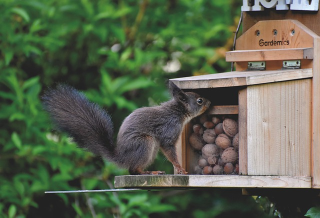

Top 5 predicted classes: 
Rank 1 - spider_monkey (prob: 0.8659999966621399)
Rank 2 - fox_squirrel (prob: 0.04571999981999397)
Rank 3 - indri (prob: 0.010859999805688858)
Rank 4 - gibbon (prob: 0.009119999594986439)
Rank 5 - Madagascar_cat (prob: 0.008179999887943268)


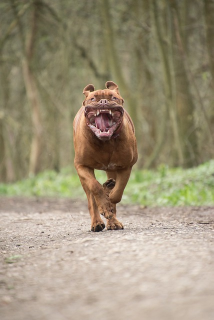

Top 5 predicted classes: 
Rank 1 - lion (prob: 0.12148000299930573)
Rank 2 - Rhodesian_ridgeback (prob: 0.11451999843120575)
Rank 3 - vizsla (prob: 0.11219000071287155)
Rank 4 - Brabancon_griffon (prob: 0.1027899980545044)
Rank 5 - tailed_frog (prob: 0.06390000134706497)


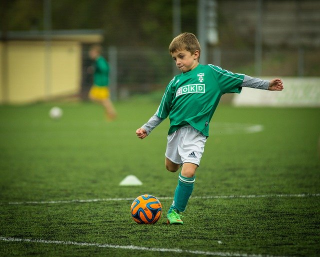

Top 5 predicted classes: 
Rank 1 - soccer_ball (prob: 0.9983900189399719)
Rank 2 - rugby_ball (prob: 0.0006500000017695129)
Rank 3 - tennis_ball (prob: 0.00046999999904073775)
Rank 4 - baseball (prob: 0.00013000000035390258)
Rank 5 - balance_beam (prob: 7.999999797903001e-05)


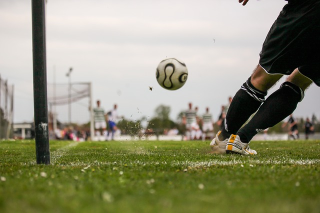

Top 5 predicted classes: 
Rank 1 - rugby_ball (prob: 0.6705399751663208)
Rank 2 - soccer_ball (prob: 0.19960999488830566)
Rank 3 - parachute (prob: 0.06283000111579895)
Rank 4 - baseball (prob: 0.021320000290870667)
Rank 5 - swing (prob: 0.013749999925494194)


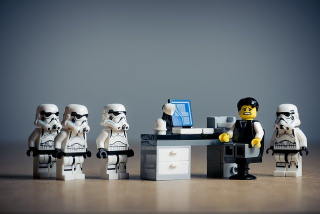

Top 5 predicted classes: 
Rank 1 - pill_bottle (prob: 0.3279699981212616)
Rank 2 - thimble (prob: 0.3065299987792969)
Rank 3 - perfume (prob: 0.1288599967956543)
Rank 4 - cocktail_shaker (prob: 0.013509999960660934)
Rank 5 - reflex_camera (prob: 0.011420000344514847)


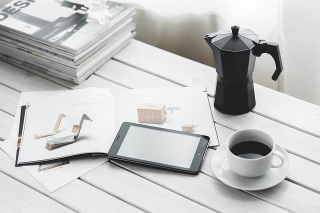

Top 5 predicted classes: 
Rank 1 - coffeepot (prob: 0.6036800146102905)
Rank 2 - sewing_machine (prob: 0.19234000146389008)
Rank 3 - loupe (prob: 0.044179998338222504)
Rank 4 - joystick (prob: 0.01205000001937151)
Rank 5 - Polaroid_camera (prob: 0.011699999682605267)


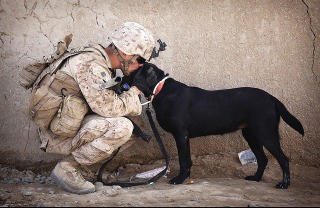

Top 5 predicted classes: 
Rank 1 - Doberman (prob: 0.22452999651432037)
Rank 2 - Boston_bull (prob: 0.19845999777317047)
Rank 3 - giant_schnauzer (prob: 0.09596999734640121)
Rank 4 - toy_terrier (prob: 0.06128999963402748)
Rank 5 - Mexican_hairless (prob: 0.04097000136971474)


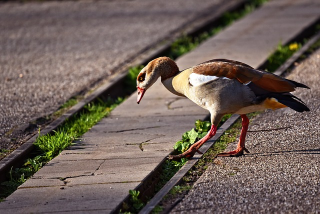

Top 5 predicted classes: 
Rank 1 - drake (prob: 0.381989985704422)
Rank 2 - peacock (prob: 0.07225000113248825)
Rank 3 - breakwater (prob: 0.06324999779462814)
Rank 4 - goose (prob: 0.03438999876379967)
Rank 5 - malinois (prob: 0.033720001578330994)


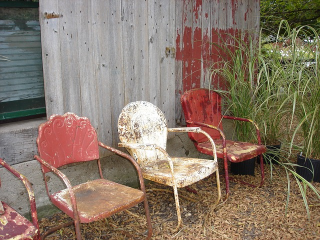

Top 5 predicted classes: 
Rank 1 - barrow (prob: 0.864870011806488)
Rank 2 - throne (prob: 0.04949000105261803)
Rank 3 - barber_chair (prob: 0.016720000654459)
Rank 4 - folding_chair (prob: 0.007710000034421682)
Rank 5 - rocking_chair (prob: 0.006800000090152025)


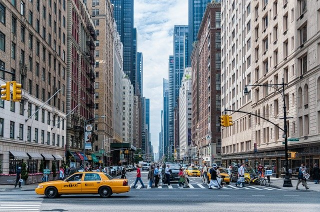

Top 5 predicted classes: 
Rank 1 - cab (prob: 0.9959999918937683)
Rank 2 - gondola (prob: 0.0003800000122282654)
Rank 3 - triumphal_arch (prob: 0.0002699999895412475)
Rank 4 - streetcar (prob: 0.0002099999983329326)
Rank 5 - lifeboat (prob: 0.0001900000061141327)


In [30]:
from google.colab.patches import cv2_imshow

for img in images:
    img_path = "SampleImages/" + img
    img_read = cv2.imread(img_path)
    img_small = cv2.resize(img_read, dsize=(0,0), fx=0.5, fy=0.5)
    
    preprocessed_img = prepare_image(img)
    predictions = mobile.predict(preprocessed_img)
    results = imagenet_utils.decode_predictions(predictions)

    cv2_imshow(img_small)

    print("Top 5 predicted classes: ")
    for i, result in enumerate(results[0]):
        print(f"Rank {i+1} - {result[1]} (prob: {np.round(result[2], 5)})")